In [1]:
import seaborn as sns
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
from biokit.viz import corrplot
from scipy import stats
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import math

In [9]:
dados = pd.read_csv("trained_samples.csv", sep = ',')

In [10]:
dados

,TC4,TC5,TC6,aspect,blue,brightness,cloudmask,evi,green,greenness,...,psri,ratio,red,savi,slope,srtm,swir1,swir2,thermal,wetness
0,-0.005719,0.110237,-0.016544,-0.738598,0.05360,0.425601,0.0001,0.204873,0.09270,0.059009,...,0.104235,2.076078,0.11830,0.191368,1.375537,333.0,0.28760,0.23470,0.30530,-0.162782
1,-0.002606,0.112459,-0.014949,0.939348,0.06285,0.474361,0.0001,0.155426,0.09870,0.034906,...,0.159624,1.721528,0.13610,0.146867,5.392657,281.0,0.35495,0.27730,0.30280,-0.225561
2,0.006625,0.053411,-0.014735,-0.991750,0.02250,0.354368,0.0001,0.413736,0.05975,0.161705,...,-0.016036,5.385455,0.05500,0.366272,7.197146,733.0,0.22965,0.11950,0.29780,-0.083762
3,-0.000680,0.073705,-0.008798,-0.477021,0.06360,0.397628,0.0001,0.161692,0.08685,0.043394,...,0.176431,1.770388,0.12630,0.147908,2.109637,352.0,0.26465,0.18565,0.29760,-0.128599
4,-0.003588,0.068320,-0.009827,0.482855,0.03170,0.352766,0.0001,0.385410,0.05940,0.141723,...,0.015146,4.456829,0.06370,0.335348,2.117319,246.0,0.21980,0.13810,0.30560,-0.085245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11216,0.003203,0.084201,-0.010987,0.000000,0.05200,0.436504,0.0001,0.272994,0.08730,0.101896,...,0.100120,2.500215,0.11645,0.253847,4.627368,379.0,0.28145,0.18870,0.30190,-0.123829
11217,-0.000254,0.109598,-0.017190,0.343265,0.06350,0.475188,0.0001,0.174123,0.10480,0.046728,...,0.142464,1.802128,0.14100,0.165925,2.959841,319.0,0.33390,0.25710,0.30020,-0.191714
11218,0.001158,0.090155,-0.020540,0.955988,0.07550,0.475443,0.0001,0.200521,0.11830,0.062083,...,0.127956,1.854288,0.15510,0.187495,3.157911,381.0,0.28950,0.20360,0.29750,-0.115205
11219,0.007292,0.078106,-0.012062,0.968106,0.04995,0.454971,0.0001,0.333283,0.09055,0.138600,...,0.075623,2.905644,0.11605,0.310501,7.363102,849.0,0.27515,0.16620,0.30300,-0.093199


In [11]:
standardiseddata = scale(dados)
standardiseddata = pd.DataFrame(standardiseddata, index=dados.index, columns=dados.columns)

/home/fernando/.local/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


In [12]:
stdzmean = standardiseddata.apply(np.mean)
stdzdev = standardiseddata.apply(np.std)

In [13]:
corr = dados.corr()

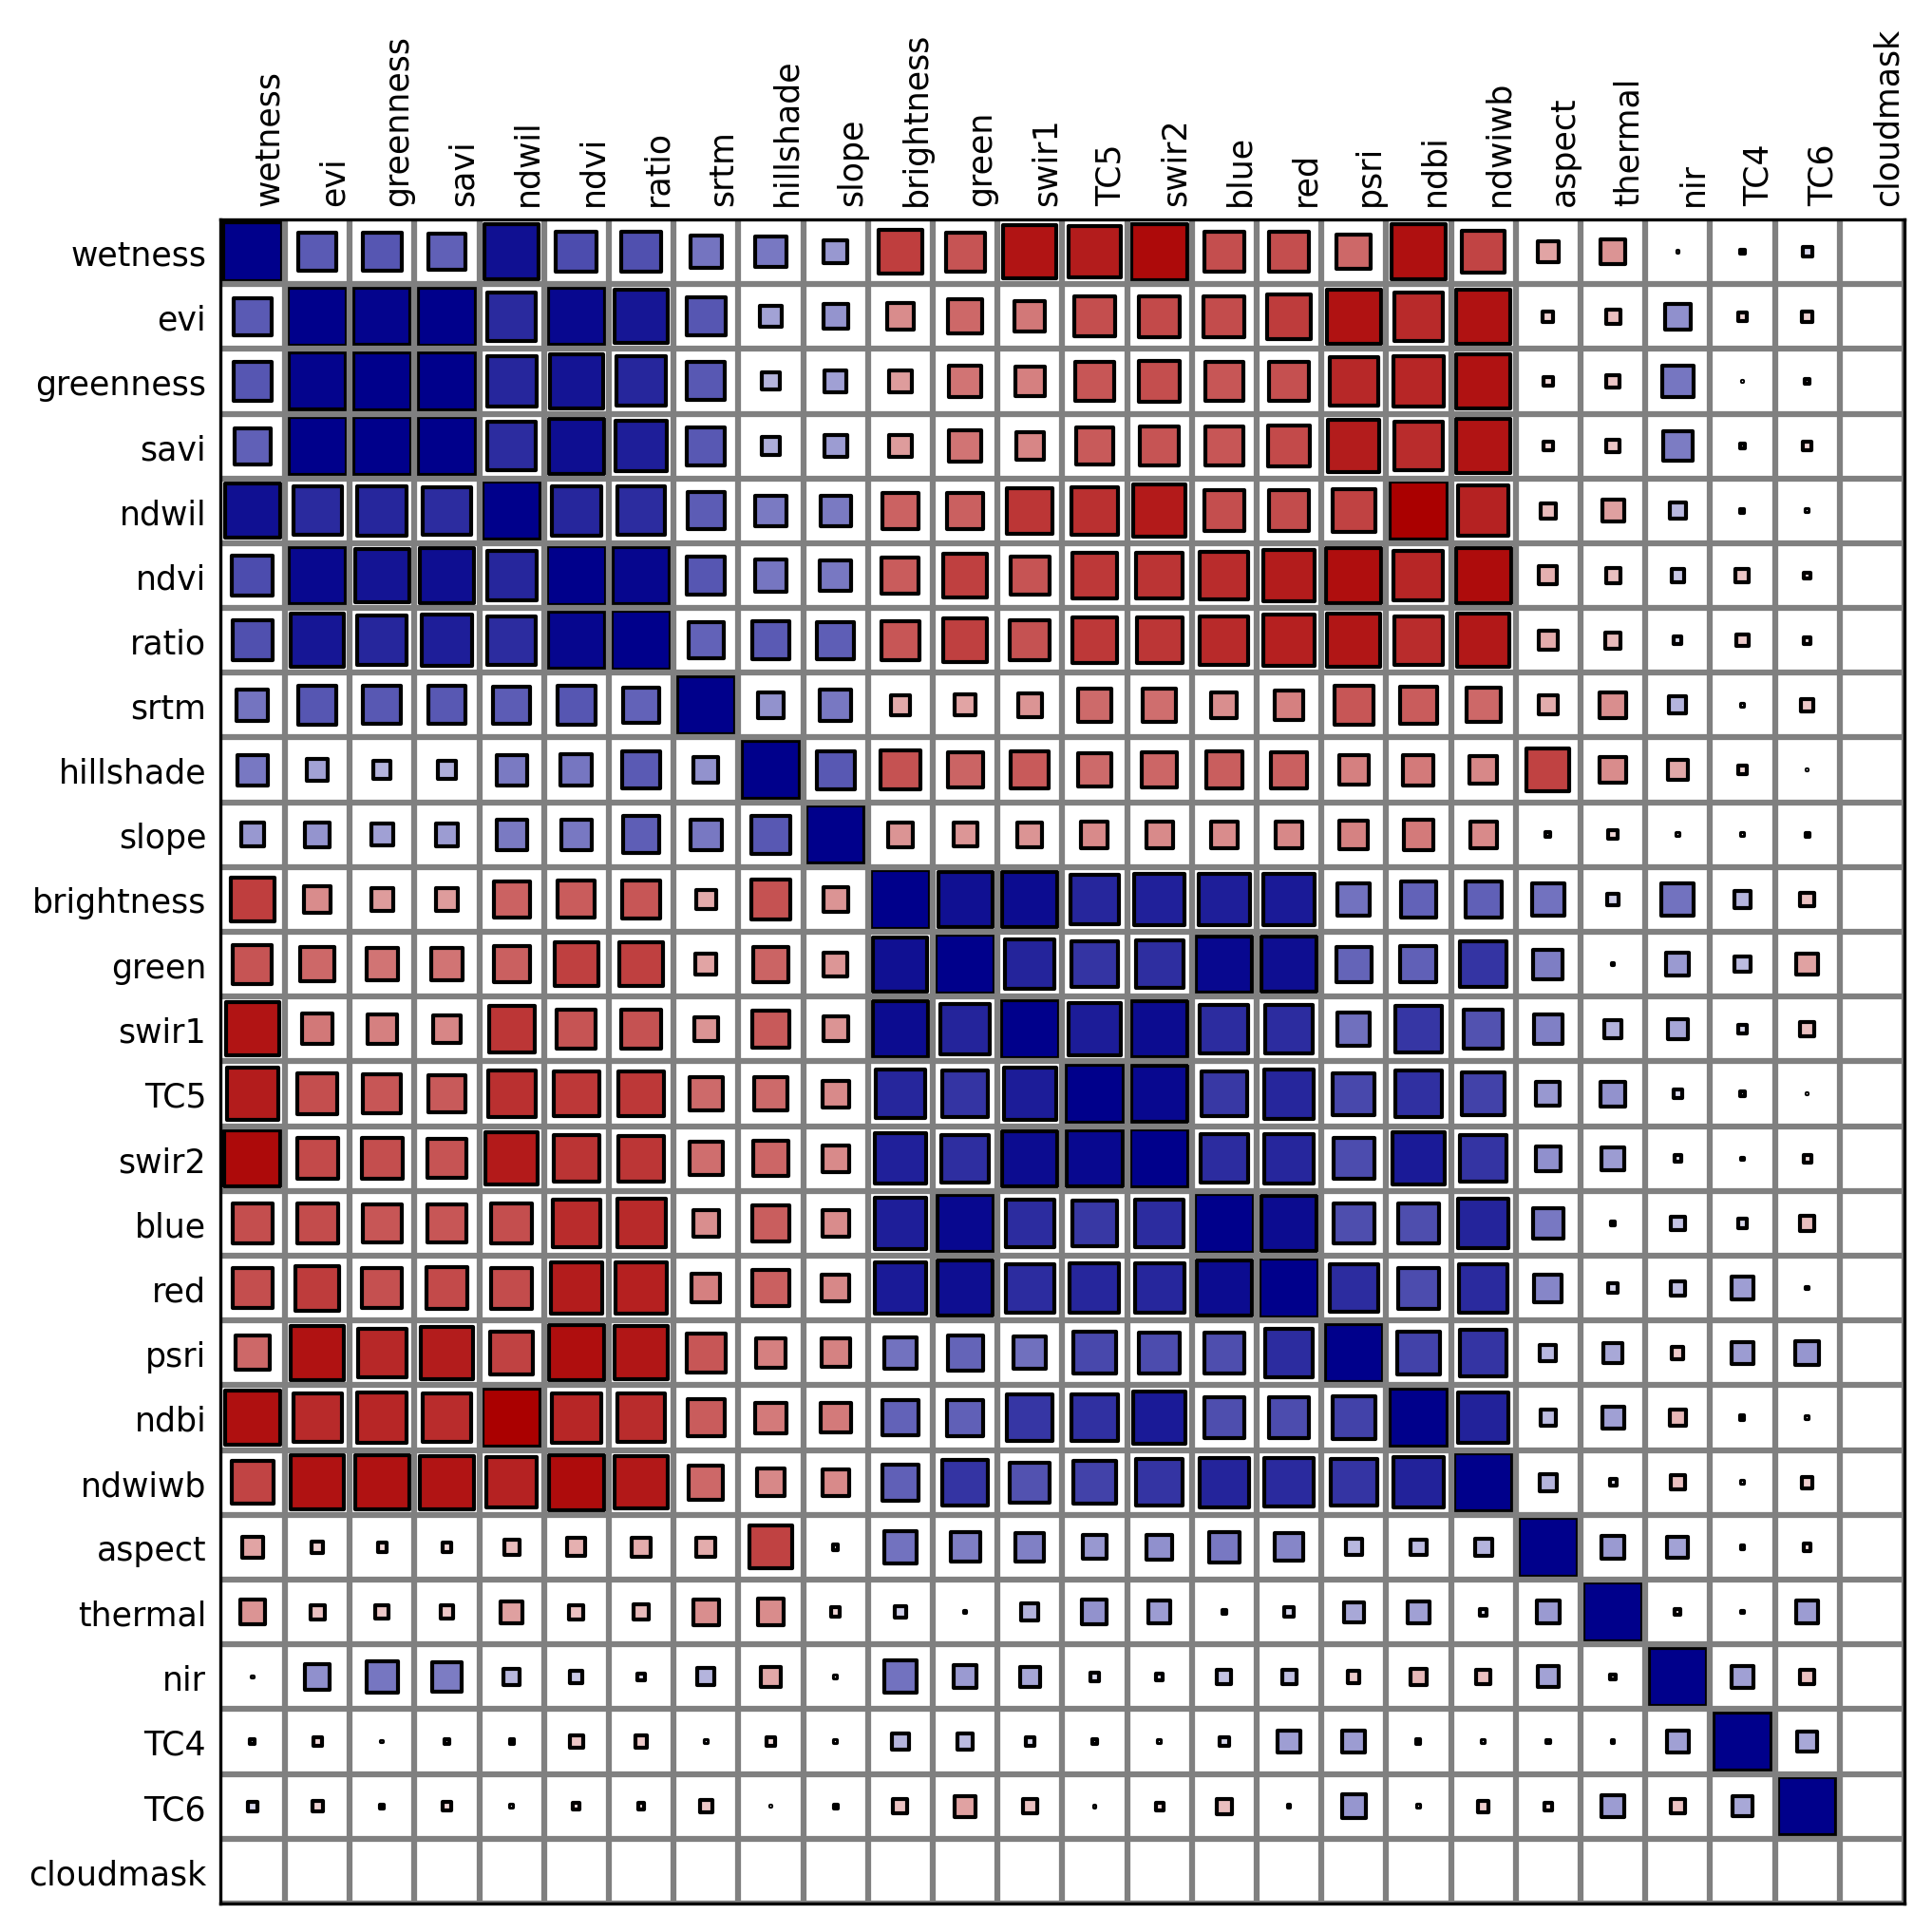

In [14]:
f, ax = plt.subplots(figsize=(9, 7), dpi = 300)
c = corrplot.Corrplot(corr)
c.plot(fig = f, colorbar=False, method='square', shrink=.9, rotation=90)

In [15]:
f.savefig('corr_plot.png')

In [16]:
def setStatCoeff(x, y, **kws):
    dat = pd.concat([x, y], axis=1)
    model = smf.ols(dat.columns[0] + ' ~ ' + dat.columns[1], data=dat).fit()
    
    ax = plt.gca()
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_title(dat.columns[0] + '-' + dat.columns[1])
    
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    
    ax.annotate('n = %4i' %model.nobs, xy = (.05, .8), xycoords=ax.transAxes)
    #ax.annotate('r = %6.4f' %math.sqrt(model.rsquared), xy = (.05, .7), xycoords=ax.transAxes)
    ax.annotate('r² = %6.4f' %model.rsquared, xy = (.05, .6), xycoords=ax.transAxes)
    ax.annotate('r²-adjusted = %6.4f' %model.rsquared_adj, xy = (.05, .5), xycoords=ax.transAxes)
    ax.annotate('f-stat = {:.2e}'.format(model.f_pvalue), xy = (.05, .4), xycoords=ax.transAxes)
    ax.annotate('y = %5.2f + (%6.3f) %s' %(model.params['Intercept'], model.params[dat.columns[1]], dat.columns[1]), xy = (.05, .3), xycoords=ax.transAxes)

In [17]:
aa = dados.loc[:,['psri','ndvi','ndwil','evi', 'srtm']]

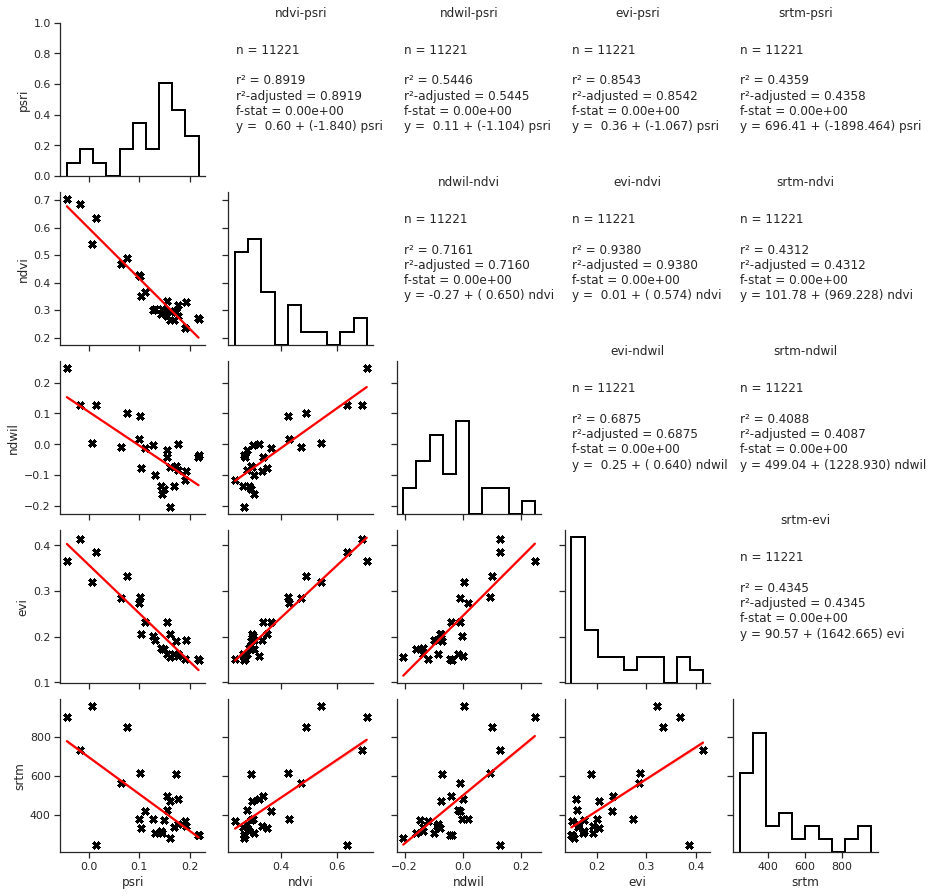

In [19]:
sns.set(style = 'ticks') # ticks, whitegrid, dark, white

g = sns.PairGrid(aa)
g.map_upper(setStatCoeff)
g.map_diag(plt.hist, color = 'black', histtype="step", linewidth = 2)
g.map_lower(sns.regplot, marker='x',scatter_kws={'color': ['black']}, line_kws={'color': 'red'})

In [20]:
g.savefig('pair_plot.png', dpi = 96)

In [21]:
pca = PCA().fit(standardiseddata)

In [22]:
def pca_summary(pca, standardised_data, out=True):
    names = ["PC"+str(i) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    a = list(np.std(pca.transform(standardised_data), axis=0))
    b = list(pca.explained_variance_ratio_)
    c = [np.sum(pca.explained_variance_ratio_[:i]) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    columns = pd.MultiIndex.from_tuples([("sdev", "Standard deviation"), ("varprop", "Proportion of Variance"), ("cumprop", "Cumulative Proportion")])
    summary = pd.DataFrame(list(zip(a, b, c)), index=names, columns=columns)
    if out:
        print("Importance of components:")
        display(summary)
    return summary

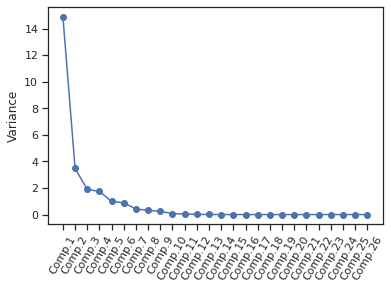

In [23]:
def screeplot(pca, standardised_values):
    y = np.std(pca.transform(standardised_values), axis=0)**2
    x = np.arange(len(y)) + 1
    plt.plot(x, y, "o-")
    plt.xticks(x, ["Comp."+str(i) for i in x], rotation=60)
    plt.ylabel("Variance")
    plt.show()

screeplot(pca, standardiseddata)

In [24]:
def calcpc(variables, loadings):
    # find the number of samples in the data set and the number of variables
    numsamples, numvariables = variables.shape
    # make a vector to store the component
    pc = np.zeros(numsamples)
    # calculate the value of the component for each sample
    for i in range(numsamples):
        valuei = 0
        for j in range(numvariables):
            valueij = variables.iloc[i, j]
            loadingj = loadings[j]
            valuei = valuei + (valueij * loadingj)
        pc[i] = valuei
    return pc

In [25]:
calcpc(standardiseddata, pca.components_[0])

array([-1.16046837, -4.40760837,  8.38773969, ..., -1.73479029,
        3.11103132, 11.45131667])

/home/fernando/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


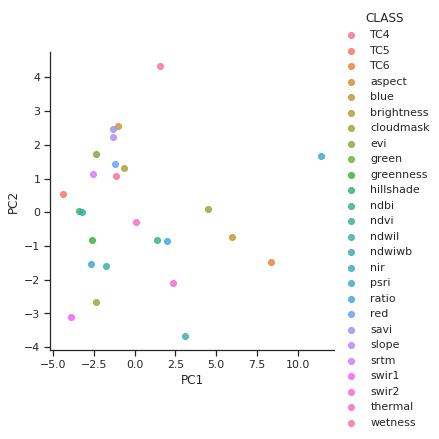

In [26]:
def pca_scatter(pca, standardised_values, classifs):
    foo = pca.transform(standardised_values)
    bar = pd.DataFrame(list(zip(foo[:, 0], foo[:, 1], classifs)), columns=["PC1", "PC2", "CLASS"])
    sns.lmplot("PC1", "PC2", bar, hue="CLASS", fit_reg=False)

pca_scatter(pca, standardiseddata, dados.columns)

In [27]:
loadings = pd.DataFrame(pca.components_.T)
loadings.index = ['PC %s' % pc for pc in loadings.index + 1]
loadings.columns = ['TS %s' % pc for pc in loadings.columns + 1]

In [28]:
def z_score(x):
    """Remove a média e normaliza os dados pelo desvio padrão"""
    return (x - x.mean()) / x.std()

In [29]:
pca = PCA(n_components=None)
pca.fit(dados.apply(z_score).T)

PCA()

In [30]:
loadings = pd.DataFrame(pca.components_.T)
loadings.index = ['PC %s' % pc for pc in loadings.index + 1]
loadings.columns = ['TS %s' % pc for pc in loadings.columns + 1]

In [31]:
PCs = np.dot(loadings.values.T, dados)

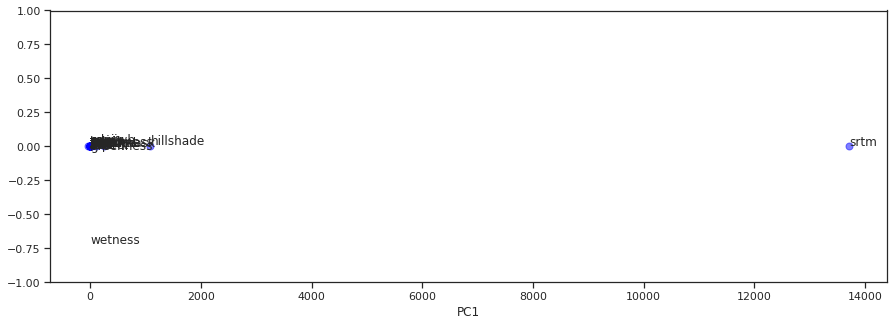

In [32]:
marker = dict(linestyle='none', marker='o', markersize=7, color='blue', alpha=0.5)

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(PCs[0], np.zeros_like(PCs[0]),
        label="Scores", **marker)
[ax.text(x, y, t) for x, y, t in zip(PCs[0], loadings.values[1, :], dados.columns)]

ax.set_xlabel("PC1")

_ = ax.set_ylim(-1, 1)
marker = dict(linestyle='none', marker='o', markersize=7, color='blue', alpha=0.5)

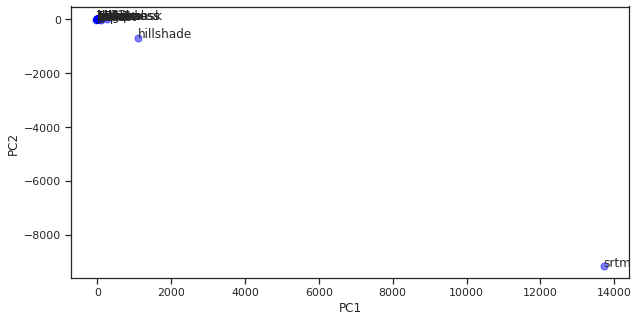

In [33]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(PCs[0], PCs[1], label="Scores", **marker)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

text = [ax.text(x, y, t) for x, y, t in
        zip(PCs[0], PCs[1]+0.5, dados.columns)]

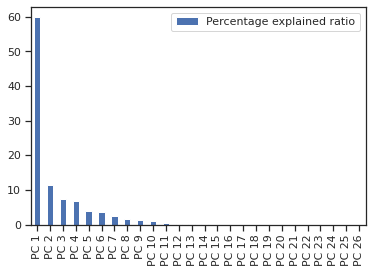

In [34]:
perc = pca.explained_variance_ratio_ * 100
perc = pd.DataFrame(perc, columns=['Percentage explained ratio'], index=['PC %s' % pc for pc in np.arange(len(perc)) + 1])

ax = perc.plot(kind='bar')